# Explore Data Analysis

In [70]:
import numpy as np
import pandas as pd
import datetime
import random

import seaborn as sns
import matplotlib.pyplot as plt


# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")                                                      


In [71]:
df = pd.read_csv('aemo_wu_merged.csv', index_col = 0)
df.head()

             timestamp  Operational Demand (MW)  temperature(celcius)  \
0  2017-01-22 00:00:00                 1815.214                  20.0   
1  2017-01-22 00:30:00                 1777.040                  20.0   
2  2017-01-22 01:00:00                 1745.448                  18.9   
3  2017-01-22 01:30:00                 1729.164                  18.9   
4  2017-01-22 02:00:00                 1714.276                  18.9   

   dew_point(celcius)  humidity(%) Wind  wind_speed(mph)  wind_gush(mph)  \
0                15.0         73.0  SSW              9.0             0.0   
1                15.0         73.0  SSW             10.0             0.0   
2                15.0         78.0  SSW              9.0             0.0   
3                15.0         78.0  SSW             15.0             0.0   
4                12.8         68.0  SSW             18.0             0.0   

   pressure(in)  precip.(in) Condition  
0          29.0          0.0      Fair  
1          29.0       

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97504 entries, 0 to 97503
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                97504 non-null  object 
 1   Operational Demand (MW)  97504 non-null  float64
 2   temperature(celcius)     97504 non-null  float64
 3   dew_point(celcius)       97504 non-null  float64
 4   humidity(%)              97504 non-null  float64
 5   Wind                     97504 non-null  object 
 6   wind_speed(mph)          97504 non-null  float64
 7   wind_gush(mph)           97504 non-null  float64
 8   pressure(in)             97504 non-null  float64
 9   precip.(in)              97504 non-null  float64
 10  Condition                97504 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.9+ MB


Except the 'Operational Demand (MW)', which is the main variable that needed to be predicted, and time, there are 9 factors in total, whithin which, there are 7 numeric type.

In [73]:
df.describe()

       Operational Demand (MW)  temperature(celcius)  dew_point(celcius)  \
count             97504.000000          97504.000000        97504.000000   
mean               2024.033428             19.192862           10.358651   
std                 403.227198              6.504368            4.280321   
min                 761.204000              1.100000          -15.000000   
25%                1739.725500             13.900000            7.200000   
50%                1949.919000             18.900000           10.000000   
75%                2260.464000             23.900000           13.900000   
max                3979.836000             42.800000           22.800000   

        humidity(%)  wind_speed(mph)  wind_gush(mph)  pressure(in)  \
count  97504.000000     97504.000000    97504.000000  97504.000000   
mean      61.199264        11.037301        0.911634     29.332540   
std       21.330864         5.149548        5.521146      0.471126   
min        5.000000         0.00000

For the 7 numeric factors, it is obviously that the 'precip.(in)' always displays 0 in most of time which means it can be directly ignored in the subsequent procession. For 'wind_gush' and 'pressure', it seems that they show a kind of polarization.

In [74]:
# Seperate timestamp and set several new variables
def wind_ans(x):
    if x > 0: 
        return "Wind" 
    else:
        return 'No Wind'
df[['Date','Trading Interval Time']] = df['timestamp'].str.split(" ",expand=True)  # split time into date and interval time
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['has_Wind'] = df['wind_speed(mph)'].apply(wind_ans) 
df.describe()

       Operational Demand (MW)  temperature(celcius)  dew_point(celcius)  \
count             97504.000000          97504.000000        97504.000000   
mean               2024.033428             19.192862           10.358651   
std                 403.227198              6.504368            4.280321   
min                 761.204000              1.100000          -15.000000   
25%                1739.725500             13.900000            7.200000   
50%                1949.919000             18.900000           10.000000   
75%                2260.464000             23.900000           13.900000   
max                3979.836000             42.800000           22.800000   

        humidity(%)  wind_speed(mph)  wind_gush(mph)  pressure(in)  \
count  97504.000000     97504.000000    97504.000000  97504.000000   
mean      61.199264        11.037301        0.911634     29.332540   
std       21.330864         5.149548        5.521146      0.471126   
min        5.000000         0.00000

## Correlation hotmap`

In [75]:
corr = df.corr()
corr

                         Operational Demand (MW)  temperature(celcius)  \
Operational Demand (MW)                 1.000000              0.196843   
temperature(celcius)                    0.196843              1.000000   
dew_point(celcius)                      0.121277              0.307910   
humidity(%)                            -0.067923             -0.771656   
wind_speed(mph)                         0.044680              0.397263   
wind_gush(mph)                         -0.018715             -0.010542   
pressure(in)                           -0.095511             -0.468408   
precip.(in)                                  NaN                   NaN   
year                                    0.017674              0.179818   
month                                  -0.159787             -0.229675   
day                                    -0.013849              0.000029   

                         dew_point(celcius)  humidity(%)  wind_speed(mph)  \
Operational Demand (MW)           

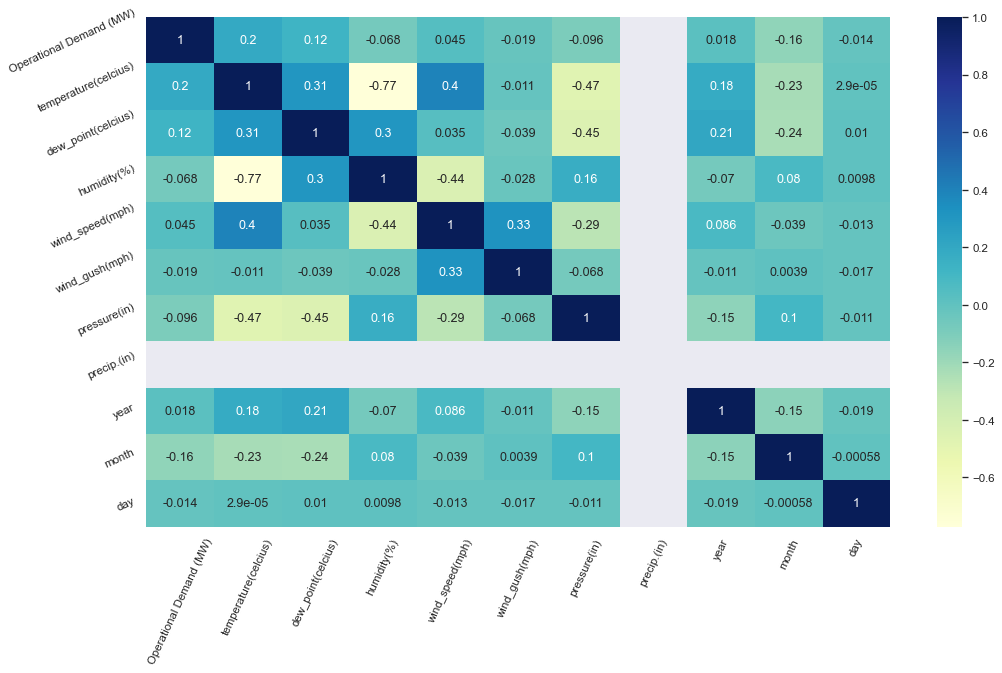

In [76]:
plt.figure(figsize=(16, 9))
ax = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.xticks(rotation=65)
plt.yticks(rotation=25)
plt.show()

From the hotmap of correlations, confimed that ‘precip.(in)' has no relation with predict variable, even the other factors.

For factors that relation to 'operation demand', the 'temperature' has the highest correlation coefficient, while month is the second, which,in certain extent, supports our project that find the top 4 peak days in summer. 


In [77]:
pd.options.display.notebook_repr_html= False
plt.rcParams['figure.dpi']=75
sns.set_theme(style='darkgrid')

## Long Term

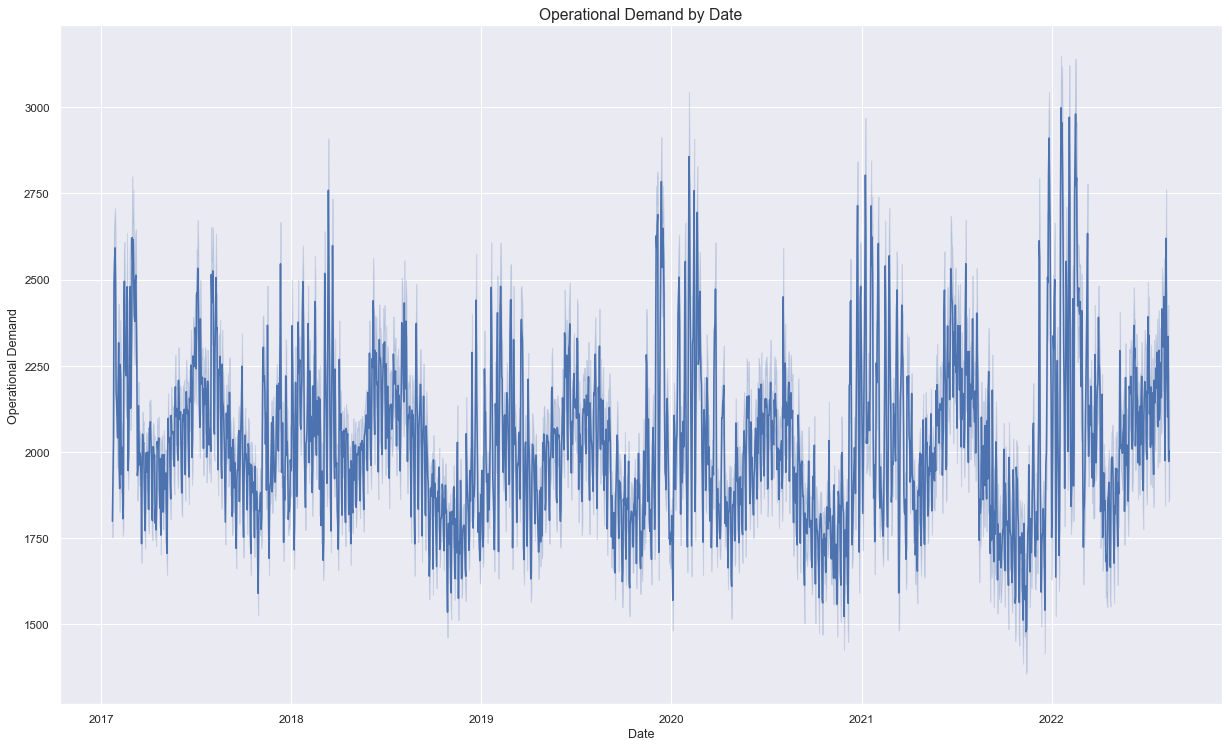

In [78]:
s=pd.DataFrame(dict(y=df['Operational Demand (MW)'],x=df['Date']))
plt.figure(figsize=(20,12))
sns.lineplot(data=s,x= 'x',y='y')
plt.xlabel('Date')
plt.ylabel('Operational Demand')
plt.title("Operational Demand by Date",fontsize = 15)
plt.show()

By date, there doesn't seem to be a significant pattern overall, but by year, the operational demand shows similar trend.At the begining, the middle and the end of each year, the demands reach peaks. Besides, for most of time, of the three peaks, at the begining of a year is the highest peak, and with time goes, this highest peak become higher and higher.

### per Month
To be more specific, we obtain the mean operational demand of each month and days

<AxesSubplot:title={'center':'Mean Operational Demand per Month'}, xlabel='month,day'>

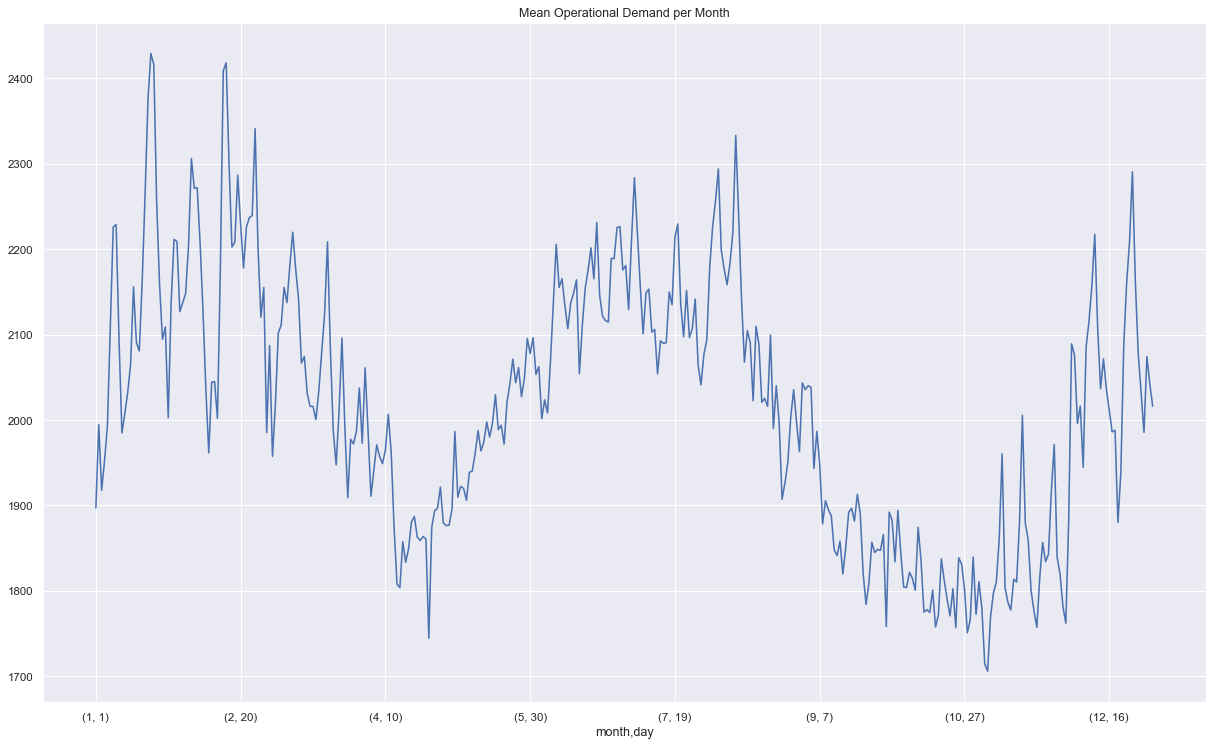

In [79]:
OD_mon_l=df.groupby([df["month"],df["day"]]).mean()['Operational Demand (MW)']
OD_mon_l.plot(title="Mean Operational Demand per Month",figsize=(20,12))

In this plot, we can see the demands more clearly in a year, which confirms that at the begining of a year, especially January and February, the demands are higher than the other months.

### per Day
Look at the data on a daily basis

<AxesSubplot:title={'center':'Mean Operational Demand per Day'}, xlabel='Trading Interval Time'>

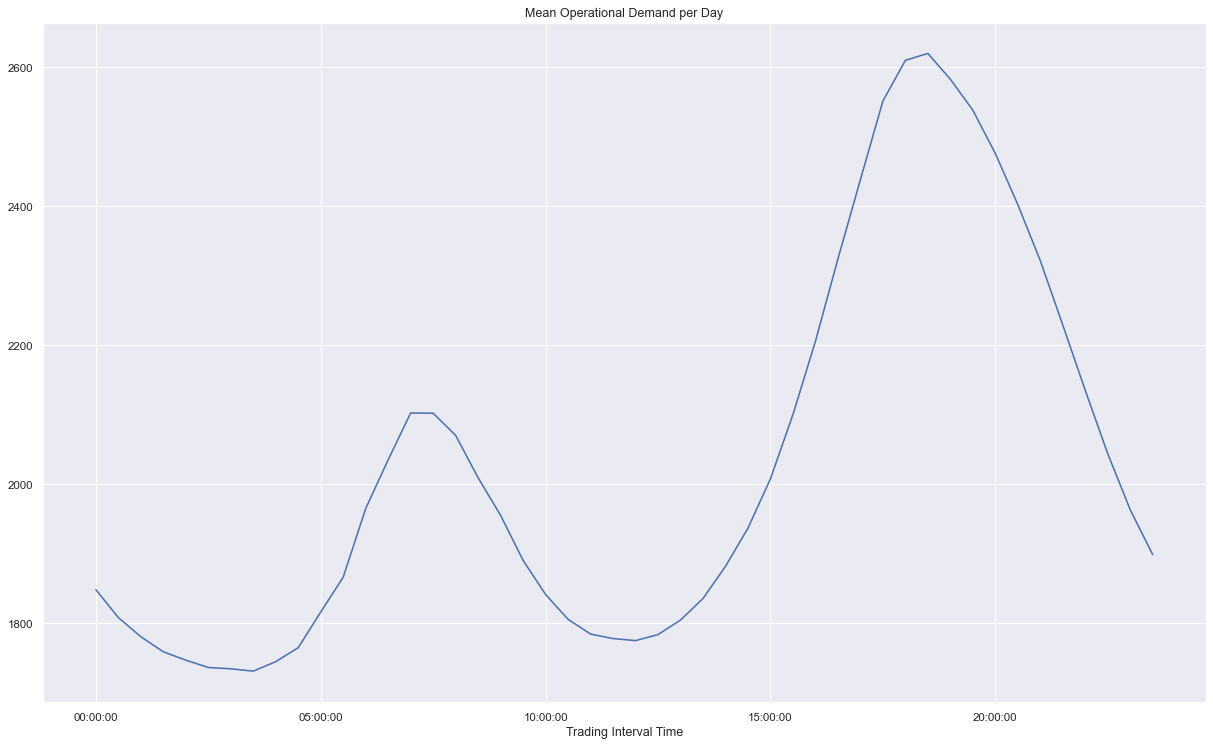

In [80]:
OD_day_l=df.groupby('Trading Interval Time').mean()['Operational Demand (MW)']
OD_day_l.plot(title="Mean Operational Demand per Day",figsize=(20,12))

In one day, the mean demand reach the highest aroung 6 to 7 p.m. and the lowest happened around 4 a.m.

## Short Term from Dec to Mar

<AxesSubplot:title={'center':'Mean Operational Demand per Month'}, xlabel='month,day'>

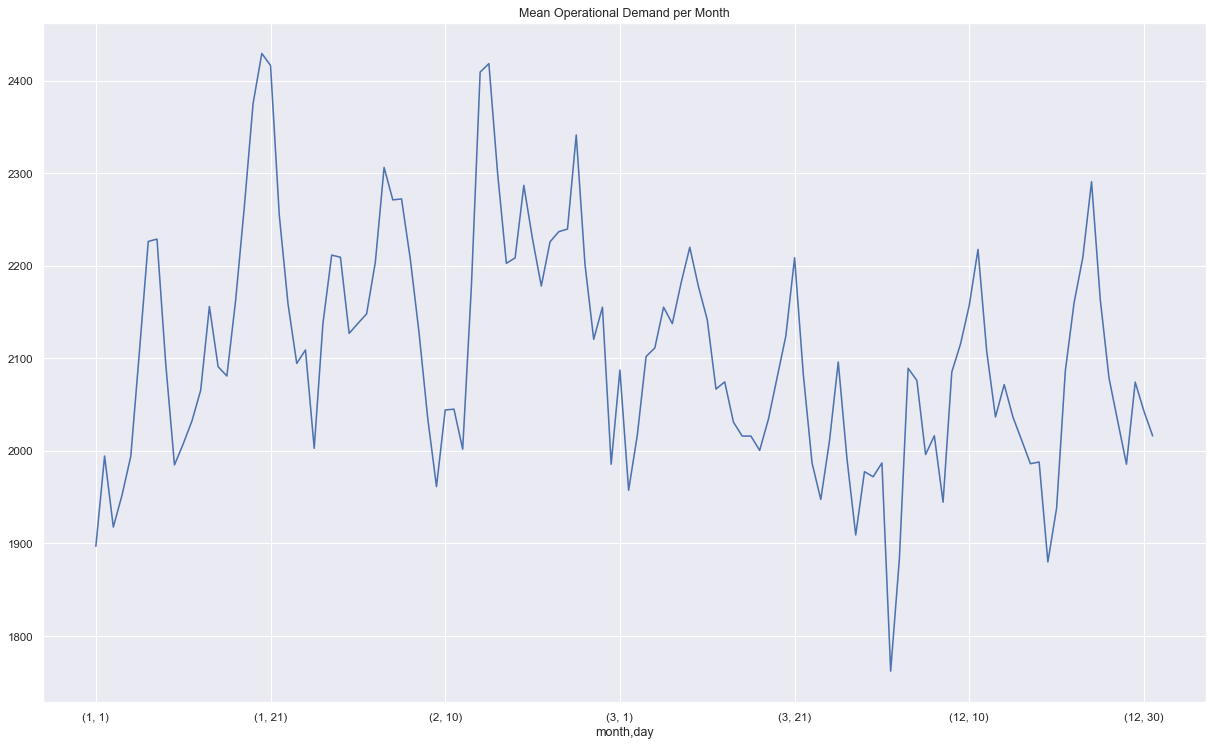

In [81]:
df_s = df[(df['month'] < 4)|(df['month'] == 12)]
OD_mon_s=df_s.groupby([df_s["month"],df_s["day"]]).mean()['Operational Demand (MW)']
OD_mon_s.plot(title="Mean Operational Demand per Month",figsize=(20,12)) 


January and February take the position of higher demands， while at the begining of December is the lowest.

## Facotrs

In [82]:
# Numeric factors
numeric = []
for i in df.columns:
    if df[i].dtype == 'float64':
        if i == 'Operational Demand (MW)':
            pass
        else:
            numeric.append(i)
numeric

['temperature(celcius)',
 'dew_point(celcius)',
 'humidity(%)',
 'wind_speed(mph)',
 'wind_gush(mph)',
 'pressure(in)',
 'precip.(in)']

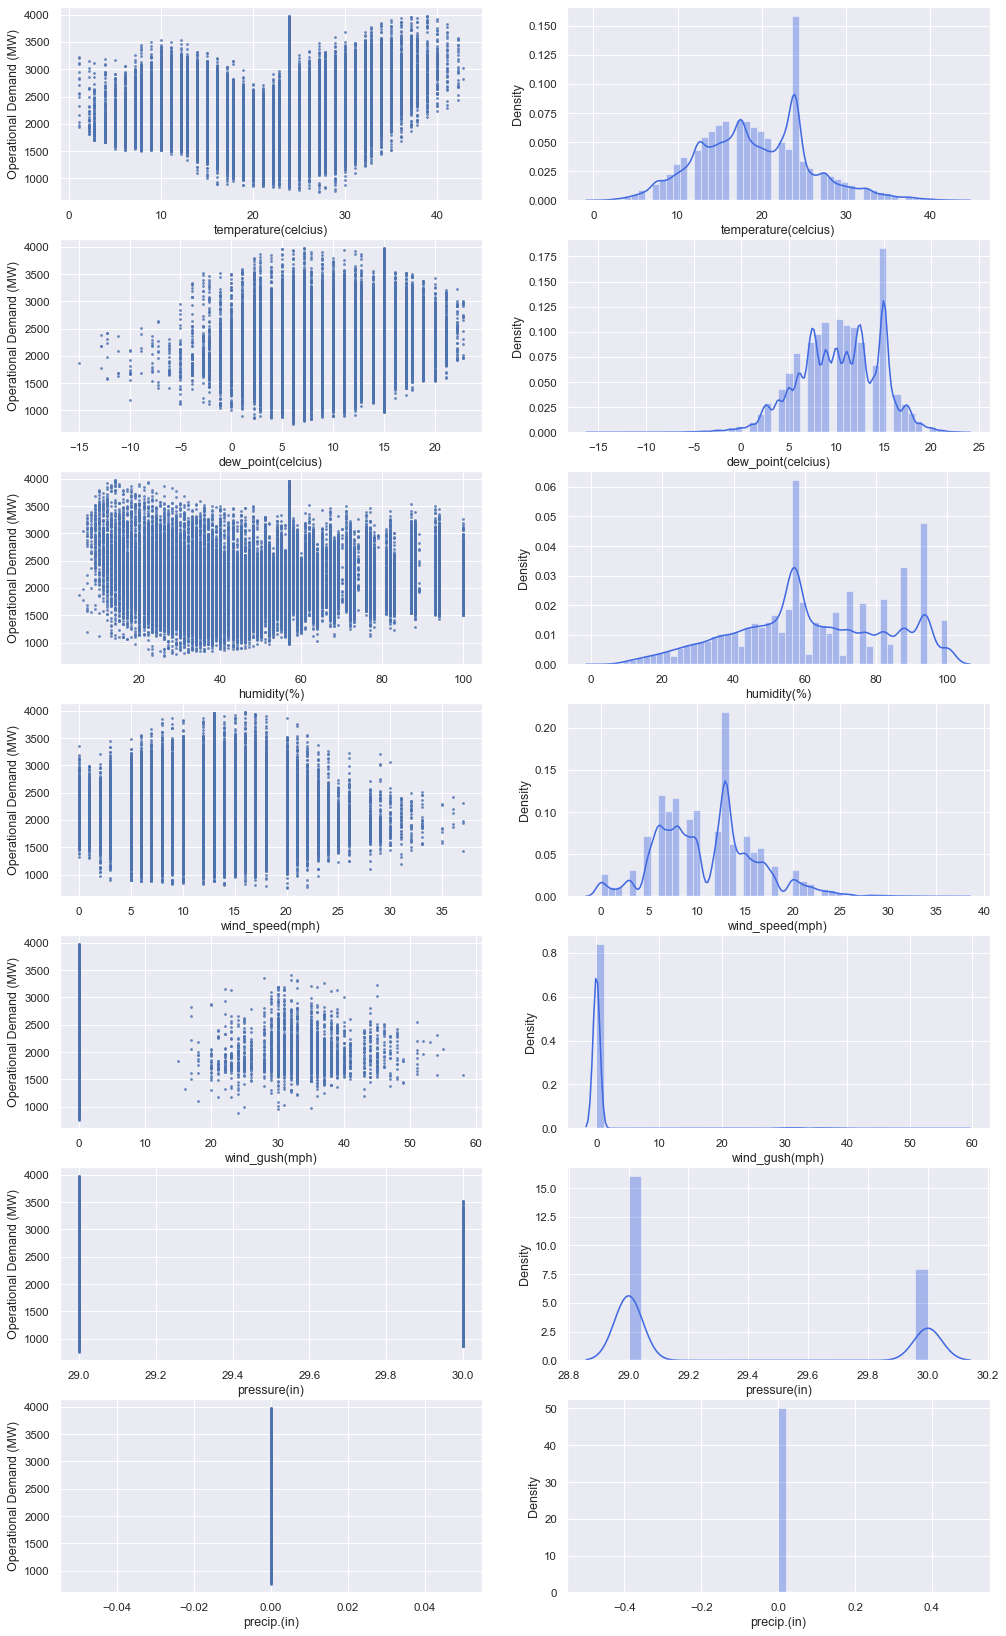

In [83]:
fig, ax = plt.subplots(len(numeric), 2, figsize=(16, len(numeric) * 4))

for n in range(len(numeric)):
    feat = numeric[n]
    ax[n, 0].scatter(df[feat].values, df['Operational Demand (MW)'].values, s=3, alpha = 0.7)
    ax[n, 0].set_ylabel("Operational Demand (MW)")
    ax[n, 0].set_xlabel(feat)

    # Distribution
    sns.distplot(df[feat].dropna(), ax=ax[n, 1], color="royalblue")

For the scatter plots above, 'temperature','dew point','humidity', 'wind speed' and 'pressure' seem have relations with 'operation demand', however, in the plots of distribution of each variables, except 'pressure', the others have more scattered data, thus we can focus on these four types.

### Monthly Trend (temp,humid,wind_speed,dew_point)

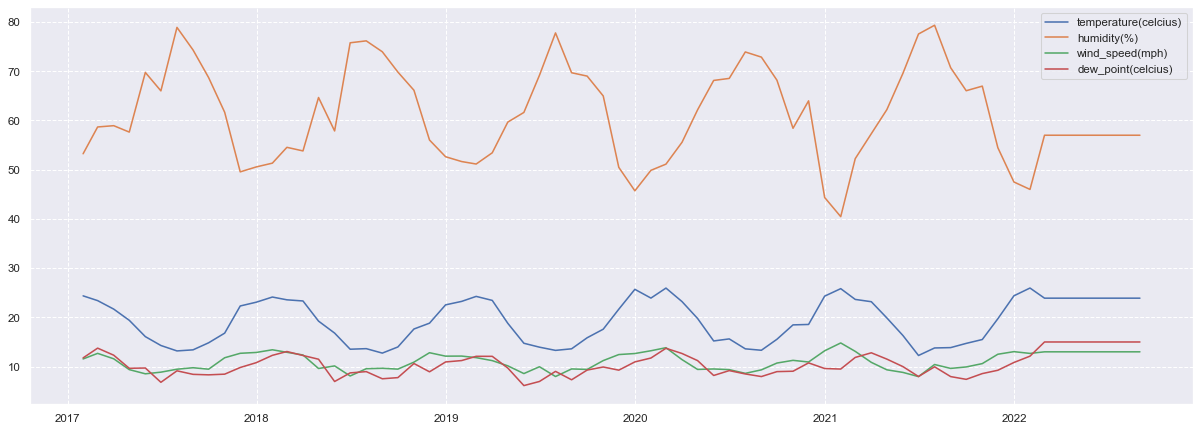

In [84]:
df.set_index('Date', inplace = True)
sub_m_df = df.resample('M')['temperature(celcius)','humidity(%)','wind_speed(mph)','dew_point(celcius)'].mean()
plt.figure(figsize = (20,7))
plt.plot(sub_m_df.index,sub_m_df["temperature(celcius)"], label = "temperature(celcius)")
plt.plot(sub_m_df.index,sub_m_df["humidity(%)"], label = "humidity(%)")
plt.plot(sub_m_df.index,sub_m_df["wind_speed(mph)"], label = "wind_speed(mph)")
plt.plot(sub_m_df.index,sub_m_df["dew_point(celcius)"], label = "dew_point(celcius)")
# plt.plot(sub_m_df.index,sub_m_df["Operational Demand (MW)"], label = "Operational Demand (MW)")
plt.grid(linestyle = "--")
plt.legend()

Follow by a line chart of the four variables, we can see that the trend of humidity is opposite to the others, and the value of it is clearly the highest among the 4 variables. As to wind speed and dew point, they mutual crisscross, about the same level. And for temperature, it is a little higher than wind speed and dew point.

### Weekly Trend (temp,humid,wind_speed,dew_point)

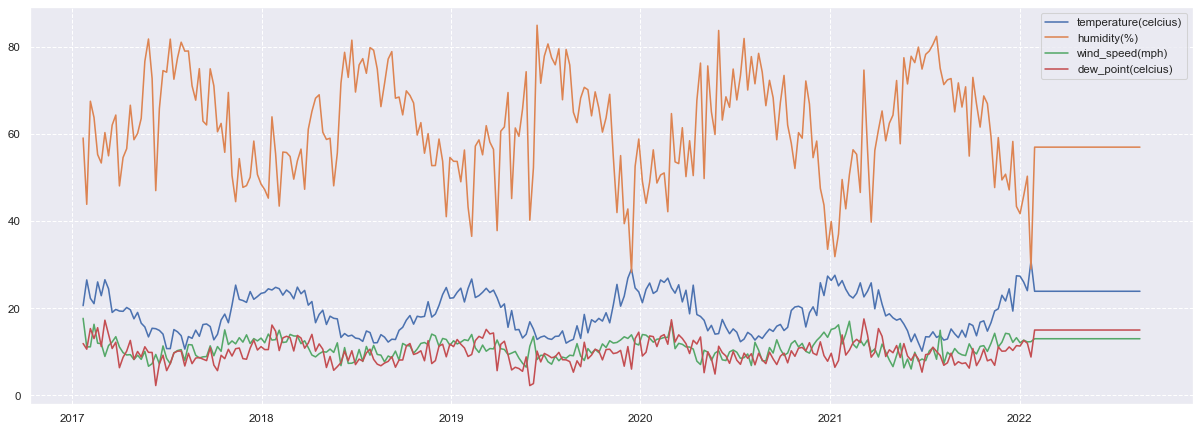

In [85]:
sub_w_df = df.resample('W')['temperature(celcius)','humidity(%)','wind_speed(mph)','dew_point(celcius)'].mean()
plt.figure(figsize = (20,7))
plt.plot(sub_w_df.index,sub_w_df["temperature(celcius)"], label = "temperature(celcius)")
plt.plot(sub_w_df.index,sub_w_df["humidity(%)"], label = "humidity(%)")
plt.plot(sub_w_df.index,sub_w_df["wind_speed(mph)"], label = "wind_speed(mph)")
plt.plot(sub_w_df.index,sub_w_df["dew_point(celcius)"], label = "dew_point(celcius)")
plt.grid(linestyle = "--")
plt.legend()

For weekly, it is similar to the month trend, only it looks a little more tortuous. The trend of three variables,except temperature, are similar to monthly, and for temperature, higher value and total opposite trend with the other three vaiables. 

### Boxplot for wind

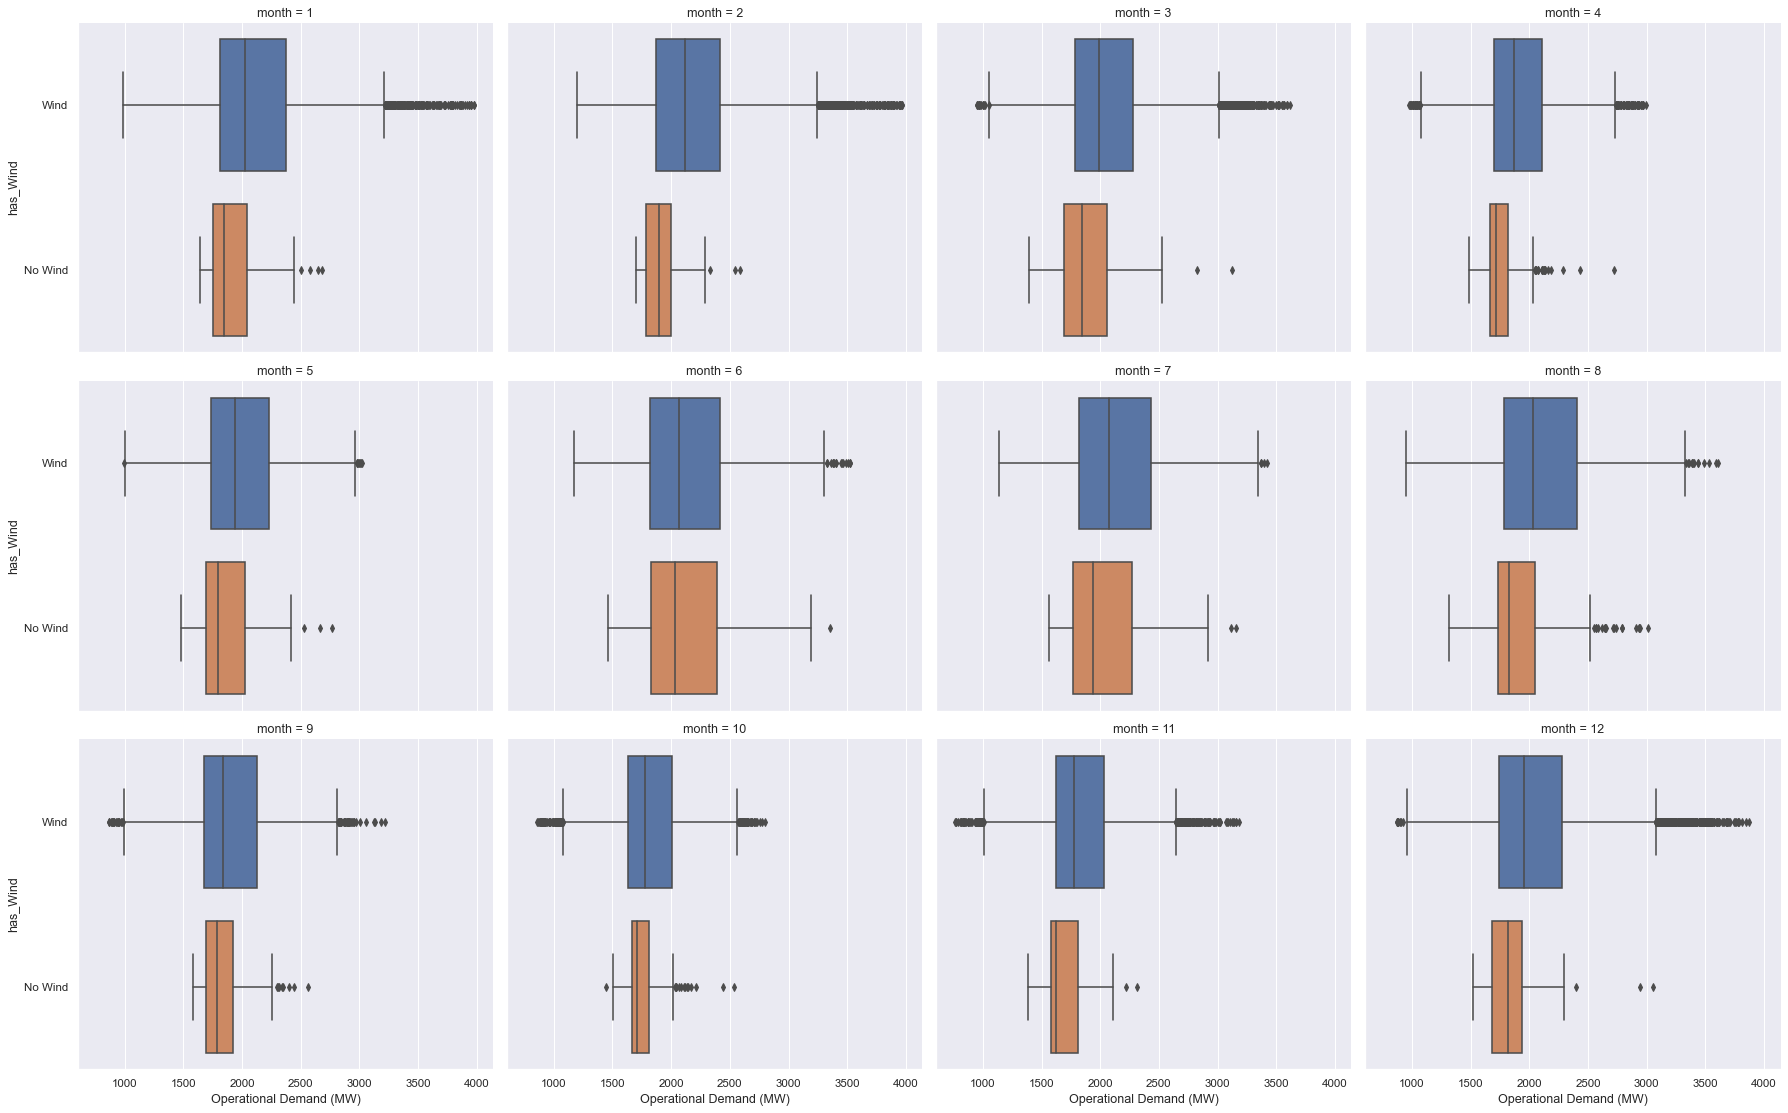

In [86]:
g = sns.catplot(kind = 'box', y= 'has_Wind', x = 'Operational Demand (MW)', data = df, col = 'month',
                orient="h", col_wrap= 4, aspect = 1.2)
g.set_xlabels("Operational Demand (MW)")

The number of windy days is higher than the number of windless days in each month, and we find that there are always a lot of outliers in the box of windy days, as to windless days, the outliers are not too much.